NAMA : SAFIRA NISFILLAILI

NIM : 4101422114

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. INFORMASI DATA

In [44]:
#pemanggilan data
data = pd.read_csv("produk_elektronik.csv")

In [45]:
data.head()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,1,Produk_1,Smartwatch,746.0,4.2,273.0,Japan
1,2,Produk_2,Headphone,241.0,3.5,239.0,Canada
2,3,Produk_3,Tablet,810.0,3.8,209.0,Canada
3,4,Produk_4,Headphone,303.0,3.2,59.0,South Korea
4,5,Produk_5,Headphone,252.0,3.7,76.0,South Korea


In [46]:
data.tail(5)

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
545,546,Produk_546,Laptop,496.0,3.9,19.0,China
546,547,Produk_547,Headphone,628.0,4.7,414.0,USA
547,548,Produk_548,Tablet,465.0,4.3,393.0,India
548,549,Produk_549,Laptop,495.0,3.1,311.0,Germany
549,550,Produk_550,Tablet,388.0,4.3,240.0,Germany


In [47]:
#melihat statistika deskriptif
data.describe()

,produk_id,harga,rating,jumlah_ulasan
count,550.000000,520.000000,500.000000,530.000000
mean,275.500000,565.715385,4.005600,259.671698
std,158.915596,625.886725,0.571052,142.655380
min,1.000000,-213.000000,3.000000,12.000000
25%,138.250000,374.000000,3.500000,139.000000
50%,275.500000,516.000000,4.000000,262.500000
75%,412.750000,656.250000,4.500000,390.750000
max,550.000000,8341.000000,5.000000,499.000000


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          520 non-null    float64
 4   rating         500 non-null    float64
 5   jumlah_ulasan  530 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut, memiliki total: 7 kolom, dengan jumlah maksimal baris untuk setiap kolom sebanyak: 550 baris. Akan tetapi terdapat beberapa kolom yang memiliki jumlah baris < 550, maka akan dilakukan proses identifikasi lebih lanjut.

2. DETEKSI MISSING VALUE

In [49]:
data.isnull()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


In [50]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
produk_id,0
nama_produk,0
kategori,0
harga,30
rating,50
jumlah_ulasan,20
negara_asal,0


In [51]:
#mengetahui jumlah missing value di seluruh dataset
data.isnull().sum().sum()

100

a. Berdasarkan output summarize tersebut, diperoleh bahwa kolom yang mengandung Missing Values (blanks/ N/A (Python : nan atau NaN)) adalah kolom harga, rating dan jumlah_ulasan. Jadi terdapat 3 kolom yang mengandung missing value.

b. Keberadaan missing values dalam dataset dapat memberikan dampak yang signifikan terhadap analisis data, terutama dalam pengambilan keputusan dan pembuatan model prediksi. Pada kolom harga, missing values dapat menyebabkan hasil analisis statistik seperti rata-rata dan distribusi harga menjadi tidak akurat. Jika harga digunakan dalam model prediksi, data yang hilang dapat menurunkan performa model dan menghasilkan kesalahan prediksi. Selain itu, jika nilai yang hilang tidak tersebar secara acak, misalnya hanya terjadi pada produk murah, maka hasil analisis bisa menjadi bias. Sementara itu, pada kolom rating, yang mencerminkan kualitas produk berdasarkan pengalaman pengguna, missing values dapat menyebabkan peringkat rata-rata suatu produk menjadi tidak akurat. Hal ini berpotensi menimbulkan bias dalam sistem rekomendasi produk serta mempengaruhi analisis kepuasan pelanggan. Jika hanya produk yang memiliki rating yang dihitung, maka produk tanpa rating bisa dianggap memiliki kualitas buruk, padahal belum tentu demikian. Sedangkan pada kolom jumlah ulasan, missing values dapat mengganggu analisis popularitas produk. Jika jumlah ulasan yang hilang cukup banyak, kita bisa salah menilai produk mana yang paling diminati oleh pelanggan. Selain itu, dalam sistem rekomendasi berbasis popularitas, data yang hilang dapat menyebabkan beberapa produk tidak diperhitungkan secara adil.

c. Dalam menangani missing values pada dataset ini, pemilihan metode disesuaikan dengan karakteristik masing-masing kolom. Untuk kolom harga, metode yang paling sesuai adalah median, karena harga produk cenderung memiliki outlier yang dapat memengaruhi nilai rata-rata jika menggunakan mean. Dengan median, nilai yang hilang dapat diisi dengan angka yang lebih representatif tanpa terpengaruh oleh nilai ekstrem. Pada kolom rating, metode yang digunakan adalah mean, karena rating biasanya memiliki distribusi yang lebih normal dan tidak terlalu terpengaruh oleh outlier, sehingga pengisian dengan nilai rata-rata tetap menghasilkan data yang valid. Sementara itu, untuk kolom jumlah ulasan, metode yang paling tepat adalah median, mengingat jumlah ulasan bisa sangat bervariasi, dengan beberapa produk memiliki ulasan dalam jumlah besar sementara yang lain sangat sedikit. Dengan menggunakan median, kita dapat menghindari distorsi akibat ulasan yang sangat tinggi atau rendah. Dengan metode ini, missing values dapat ditangani secara optimal tanpa mengubah distribusi data secara signifikan.

d. HANDLING MISSING VALUE

HARGA

In [52]:
#melihat isi dalam kolom duration
data['harga'].unique()

array([ 7.460e+02,  2.410e+02,  8.100e+02,  3.030e+02,  2.520e+02,
        3.350e+02,  8.900e+02,  4.910e+02,  6.050e+02,  4.630e+02,
        4.810e+02,  3.980e+02,  5.100e+02,  5.980e+02,  8.350e+02,
        1.250e+02,  8.220e+02,  4.260e+02,  3.900e+02,  7.080e+02,
        5.450e+02,        nan,  5.720e+02,  7.280e+02,  6.710e+02,
        3.740e+02,  2.310e+02,  4.340e+02,  1.150e+03,  3.310e+02,
        5.780e+02,  4.750e+02,  4.590e+02,  9.040e+02,  4.970e+02,
        5.400e+02,  3.390e+02,  2.110e+02,  8.620e+02,  5.800e+02,
        5.180e+02,  5.160e+02,  4.480e+02,  7.360e+02,  2.280e+02,
        1.830e+02,  5.150e+02,  7.120e+02,  5.470e+02,  4.360e+02,
        5.910e+02,  5.370e+02,  6.650e+02,  7.650e+02,  3.090e+02,
        4.290e+02,  2.960e+02,  6.660e+02,  3.550e+02,  1.240e+02,
        3.850e+02,  2.010e+02,  8.180e+02,  5.940e+02,  6.290e+02,
        6.070e+02,  6.680e+02,  7.260e+02,  3.920e+02,  2.160e+02,
        3.300e+02,  4.900e+02, -1.200e+01,  1.200e+02,  6.190e

In [53]:
#jumlah missing value
np.sum(data['harga'].isnull())

30

Berdasarkan missing value yang didapatkan, terdapat 30 missing value untuk kolom harga.

In [54]:
#mengisi missing value
data['harga']=data['harga'].fillna(data['harga'].median())

In [55]:
#jumlah missing value
np.sum(data['harga'].isnull())

0

RATING

In [56]:
#melihat isi dalam kolom duration
data['rating'].unique()

array([4.2, 3.5, 3.8, 3.2, 3.7, 4. , 4.5, 3. , 3.9, 3.6, 4.7, 4.4, nan,
       3.1, 4.9, 4.6, 5. , 4.8, 4.3, 3.4, 4.1, 3.3])

In [57]:
#jumlah missing value
np.sum(data['rating'].isnull())

50

Berdasarkan missing value yang didapatkan, terdapat 50 missing value untuk kolom rating.

In [58]:
#mengisi missing value
data['rating']=data['rating'].fillna(data['rating'].mean())

In [59]:
#jumlah missing value
np.sum(data['rating'].isnull())

0

JUMLAH_ULASAN

In [60]:
#melihat isi dalam kolom duration
data['jumlah_ulasan'].unique()

array([273., 239., 209.,  59.,  76., 309., 390.,  67., 268.,  nan, 335.,
       139., 224., 181., 267., 111., 218., 300., 363., 480., 295., 125.,
       159., 451.,  45., 462., 342., 486., 296., 312., 320., 217., 115.,
       455., 167., 130.,  64., 409.,  21., 154., 405., 145., 477.,  12.,
       153.,  39., 246., 288., 357., 113., 127.,  14., 257., 373., 330.,
       158.,  93., 463., 475., 465., 240., 297., 170., 281., 469.,  47.,
       235., 151., 301., 490., 160., 123.,  75., 370., 350., 484., 258.,
       466., 458., 340., 332., 189., 199., 416., 163., 205., 271., 428.,
       415., 436., 152., 351., 110., 253., 499., 248.,  58.,  51., 175.,
        91., 438., 225., 471., 143., 345.,  16., 445.,  23.,  82., 408.,
       414., 172., 356., 215., 285., 265., 275.,  34., 459., 290., 262.,
       319., 298., 173., 104., 119., 247., 396., 492., 434., 399., 150.,
       126., 491., 401., 461.,  88.,  77., 182., 453., 137., 105., 101.,
        40., 343.,  29., 155., 325., 456., 169., 35

In [61]:
#jumlah missing value
np.sum(data['jumlah_ulasan'].isnull())

20

Berdasarkan missing value yang didapatkan, terdapat 20 missing value untuk kolom jumlah_ulasan.

In [62]:
#mengisi missing value
data['jumlah_ulasan']=data['jumlah_ulasan'].fillna(data['jumlah_ulasan'].median())

In [63]:
#jumlah missing value
np.sum(data['jumlah_ulasan'].isnull())

0

3. CEK DAN PENANGANAN OUTLIER

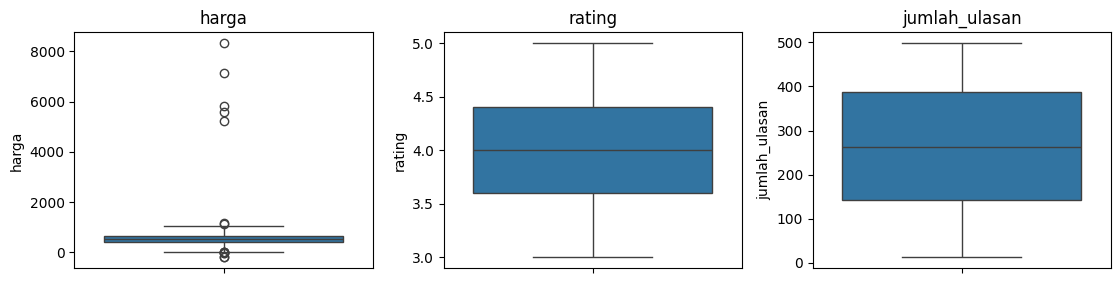

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['harga', 'rating', 'jumlah_ulasan', ]

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [65]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

harga: 14 outliers
rating: 0 outliers
jumlah_ulasan: 0 outliers


a. Hasil Identifikasi Outlier dalam Dataset

Berdasarkan hasil identifikasi outlier pada dataset yang, ditemukan bahwa variabel harga memiliki banyak outlier. Hal ini menunjukkan adanya beberapa nilai harga yang jauh lebih tinggi dibandingkan dengan mayoritas data, sehingga distribusi harga tampak tidak merata. Sementara itu, variabel rating tidak menunjukkan adanya outlier yang signifikan, dengan distribusi data yang relatif normal dan whisker yang tidak terlalu panjang. Adapun variabel jumlah_ulasan juga tidak memiliki outlier yang mencolok, dengan data yang tersebar cukup merata dalam rentang yang ditampilkan. Dari hasil analisis ini, dapat disimpulkan bahwa variabel harga memiliki banyak nilai ekstrem yang perlu diperhatikan dalam analisis lebih lanjut, terutama dalam proses pembersihan data atau transformasi agar hasil analisis menjadi lebih akurat.

b. Keberadaan outlier dalam analisis data dapat menyebabkan distorsi hasil statistik, seperti membuat rata-rata menjadi tidak representatif dan meningkatkan simpangan baku. Dalam model prediktif, outlier dapat memengaruhi akurasi prediksi, terutama dalam regresi linear yang sensitif terhadap nilai ekstrem. Selain itu, outlier dapat menyebabkan kesalahan dalam pengambilan keputusan dan menyulitkan visualisasi data karena skala yang tidak proporsional. Namun, dalam beberapa kasus, outlier bisa memberikan wawasan berharga, seperti mendeteksi anomali atau tren baru. Oleh karena itu, penting untuk mengidentifikasi dan menangani outlier dengan tepat sesuai dengan konteks analisis.

c. Dari hasil boxplot, variabel harga memiliki banyak outlier yang signifikan, sehingga metode winsorizing dapat digunakan untuk mengendalikan dampaknya.



d.

In [66]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

In [67]:
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outlier")

harga: 0 outlier
rating: 0 outlier
jumlah_ulasan: 0 outlier


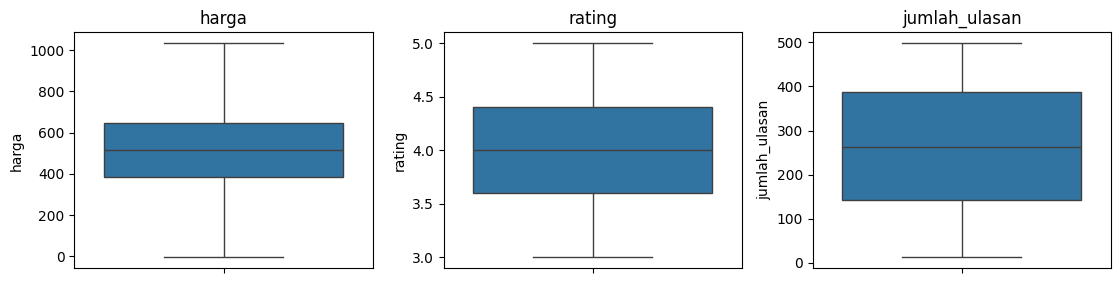

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['harga','rating','jumlah_ulasan']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


4. ENCODING DATA

a. Dalam dataset ini, terdapat tiga kolom kategorikal yang memerlukan encoding, yaitu:

kategori → Kategori produk, misalnya "elektronik", "gadget", dll.

negara_asal → Negara asal produk, misalnya "China", "USA", dll.

b. Terdapat beberapa metode encoding yang dapat digunakan untuk mengubah data kategorikal menjadi numerik, masing-masing dengan kelebihan dan kekurangannya. Label Encoding mengubah kategori menjadi angka, seperti "China" menjadi 0 dan "USA" menjadi 1. Metode ini cocok untuk data yang memiliki urutan atau jumlah kategori yang sedikit, tetapi dapat menyebabkan model menganggap ada hubungan hierarkis antara kategori yang sebenarnya bersifat nominal. One-Hot Encoding mengubah kategori menjadi beberapa kolom biner, misalnya "China" menjadi [1,0] dan "USA" menjadi [0,1]. Metode ini cocok untuk data kategorikal tanpa urutan, tetapi jika jumlah kategori terlalu banyak, jumlah kolom bisa bertambah drastis sehingga meningkatkan kompleksitas model. Target Encoding menggantikan kategori dengan rata-rata target dari masing-masing kategori, yang bermanfaat dalam model prediksi, tetapi dapat menyebabkan data leakage jika tidak diterapkan dengan benar.

Dalam dataset ini, metode encoding dipilih berdasarkan karakteristik masing-masing kolom. Kolom kategori diencoding menggunakan One-Hot Encoding, karena kategori produk bersifat nominal tanpa hubungan hierarkis, sehingga representasi biner lebih sesuai. Kolom negara_asal menggunakan Label Encoding, karena jumlah negara biasanya tidak terlalu banyak dan dapat diurutkan jika diperlukan dalam analisis tertentu.

In [69]:
#melihat isi dalam kolom
data['kategori'].unique()

array(['Smartwatch', 'Headphone', 'Tablet', 'Laptop', 'Camera',
       'Smartphone'], dtype=object)

In [70]:
data['negara_asal'].unique()

array(['Japan', 'Canada', 'South Korea', 'France', 'USA', 'Germany',
       'China', 'India', 'UK'], dtype=object)

KATEGORI

In [71]:
data['jenis'] = data ['kategori']
data = pd.get_dummies(data, columns=['jenis'], prefix='kategori')

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   produk_id            550 non-null    int64  
 1   nama_produk          550 non-null    object 
 2   kategori             550 non-null    object 
 3   harga                550 non-null    float64
 4   rating               550 non-null    float64
 5   jumlah_ulasan        550 non-null    float64
 6   negara_asal          550 non-null    object 
 7   kategori_Camera      550 non-null    bool   
 8   kategori_Headphone   550 non-null    bool   
 9   kategori_Laptop      550 non-null    bool   
 10  kategori_Smartphone  550 non-null    bool   
 11  kategori_Smartwatch  550 non-null    bool   
 12  kategori_Tablet      550 non-null    bool   
dtypes: bool(6), float64(3), int64(1), object(3)
memory usage: 33.4+ KB


NEGARA_ASAL

In [73]:
# Buat dictionary untuk mapping negara ke region
negara_asal_to_benua = {
    'USA': 'America', 'Canada': 'America', 'UK': 'Europe', 'France': 'Europe', 'Germany': 'Europe',
    'China' : 'Asia', 'Japan': 'Asia', 'India': 'Asia', 'South Korea': 'Asia',
}

# Ubah negara menjadi region
data['benua'] = data['negara_asal'].map(negara_asal_to_benua).fillna('Others')

# One-Hot Encoding pada region
data = pd.get_dummies(data, columns=['benua'], prefix='benua')

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   produk_id            550 non-null    int64  
 1   nama_produk          550 non-null    object 
 2   kategori             550 non-null    object 
 3   harga                550 non-null    float64
 4   rating               550 non-null    float64
 5   jumlah_ulasan        550 non-null    float64
 6   negara_asal          550 non-null    object 
 7   kategori_Camera      550 non-null    bool   
 8   kategori_Headphone   550 non-null    bool   
 9   kategori_Laptop      550 non-null    bool   
 10  kategori_Smartphone  550 non-null    bool   
 11  kategori_Smartwatch  550 non-null    bool   
 12  kategori_Tablet      550 non-null    bool   
 13  benua_America        550 non-null    bool   
 14  benua_Asia           550 non-null    bool   
 15  benua_Europe         550 non-null    boo